In [1]:
import file_read
import baseline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import peakutils
import pandas as pd
from matplotlib import rcParams

../../data/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened


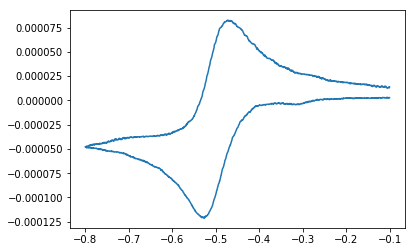

In [4]:
dict_1,n_cycle = file_read.read_file('../../data/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
df = file_read.data_frame(dict_1, 1)
plt.plot(df.Potential, df.Current, label = "Cycle{}".format(1))

In [5]:
type(df.Potential)

pandas.core.series.Series

In [6]:
a,b = baseline.split(df.Potential)
len(a)

1400

In [37]:
def test_split():
    """
    This function tests the split function.
    The output of the function has to be np.array.
    Split function splits the length of input vector
    in two. So, len of output should equal to half len
    of input.
    """
    dict_1,n_cycle = file_read.read_file('../../data/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
    df = file_read.data_frame(dict_1, 1)
    x = df.Potential
    a,b = baseline.split(x)
    assert type(a) == np.ndarray, "The output type is incorrect."
    assert type(b) == np.ndarray, "The output type is incorrect."
    #assert len(a)  int(len(x)/2), "The output should be "
    np.testing.assert_almost_equal(len(a),(len(x)/2), decimal=0), "Output length is incorrect"
    np.testing.assert_almost_equal(len(b),(len(x)/2), decimal=0), "Output length is incorrect"
    return "Test of split function passed!"

In [38]:
test_split()

../../data/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened


'Test of split function passed!'

In [27]:
def test_critical_idx():
    """
    Critical_idx returns idx of the index of the intercepts of different moving average curves.
    Test the output if it is a single index.
    Test if the output is integer.
    Test if the index exist in original input.
    """
    dict_1,n_cycle = file_read.read_file('../../data/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
    df = file_read.data_frame(dict_1, 1)
    x1,x2 = baseline.split(df.Potential)
    y1,y2 = baseline.split(df.Current)
    idx = baseline.critical_idx(x1,y1)
    assert type(idx) == np.int64, ("Output should be integer, but"
                                   "Function is returning {}".format(type(idx)))
    assert idx.shape == (), "This function should return single idx"
    assert 0 < idx <len(x1), "Output index is out of order"
    return "Test of critical_idx function passed!"

In [28]:
test_critical_idx()

../../data/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened


'Test of critical_idx function passed!'

In [48]:
def test_sum_mean():
    """
    Target function returns the mean and sum of the given vector.
    Expect output to be a list, with length 2.
    Can also test if the mean is correctly calculated.
    """
    dict_1,n_cycle = file_read.read_file('../../data/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
    df = file_read.data_frame(dict_1, 1)
    x1,x2 = baseline.split(df.Potential)
    y1,y2 = baseline.split(df.Current)
    a = baseline.sum_mean(x1)
    assert type(a) == list, ("Output should be list object,"
                                                " but fuction is returning{}".format(type(a)))
    assert len(a) == 2, ("length of output should be 2,"
                        "but, function is returning a list with length{}".format(len(a)))
    np.testing.assert_almost_equal(a[1],np.mean(x1), decimal=3), "Mean is calculated incorrectly"
    return "Test of sum_mean function passed!"

In [49]:
test_sum_mean()

../../data/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened


'Test of sum_mean function passed!'

In [47]:
x1,x2 = baseline.split(df.Potential)
y1,y2 = baseline.split(df.Current)
idx = baseline.critical_idx(x1,y1)
a = baseline.sum_mean(x1)
np.mean(x1)
a[1]

-0.4497823557142856

In [ ]:
if x.shape[0] != y.shape[0]:
    raise ValueError("x and y must have same first dimension, but "
                    "have shapes {} and {}".format(x.shape, y.shape))